# MOVIE COLLECTION PREDICTION USING DECISION TREE REGRESSION

## PROJECT OVERVIEW
In this project, a Decision Tree Regression model is built to predict movie revenue based on various production, marketing, and movie-related features. The objective is to analyze how different factors influence a movie’s overall box office collection.

## DATASET DESCRIPTION
The dataset contains multiple features related to movies and their production details, including:
- Marketing Expense
- Production Expense
- Multiplex Coverage
- Budget
- Movie Length
- Lead Actor Rating
- Lead Actress Rating
- Director Rating
- Producer Rating
- Critic Rating
- Trailer Views
- 3D Availability
- Time Taken
- Twitter Hashtags
- Genre
- Average Age of Actors
- Number of Multiplexes

### TARGET VARIABLE
- Collection: Represents the total box office revenue of a movie.
 
## MODEL USED
- Decision Tree Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz

from IPython.display import Image


In [2]:
# conda install pydotplus


In [3]:
import pydotplus

In [4]:
df = pd.read_csv('Movie_regression.csv')

In [5]:
df.head(5)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
df["Time_taken"].fillna(df["Time_taken"].mean(), inplace = True)

In [9]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [10]:
df = pd.get_dummies(df,columns=["3D_available", "Genre"], drop_first=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [12]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [13]:
X = df.drop("Collection", axis=1)
y = df["Collection"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1988)

In [14]:
len(X_train), len(y_train), len(X_test), len(y_test)

(404, 404, 102, 102)

In [15]:
model = DecisionTreeRegressor(max_depth=4,min_samples_leaf=round(0.05*len(df)), max_leaf_nodes=5)

In [16]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=5, min_samples_leaf=25)

In [17]:
model.score(X_train,y_train)

0.703226446559073

In [18]:
y_pred = model.predict(X_test)

In [19]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test,y_pred)
print (f"MAE = {MAE:.2f}\nMSE = {MSE:.2f}\nRMSE = {np.sqrt(MSE):.2f}\nr2_score = {r2s:.2f}")

MAE = 7342.78
MSE = 91874180.14
RMSE = 9585.10
r2_score = 0.74


In [20]:
 dot_data = export_graphviz(model, out_file=None, feature_names= X_train.columns, filled= True)

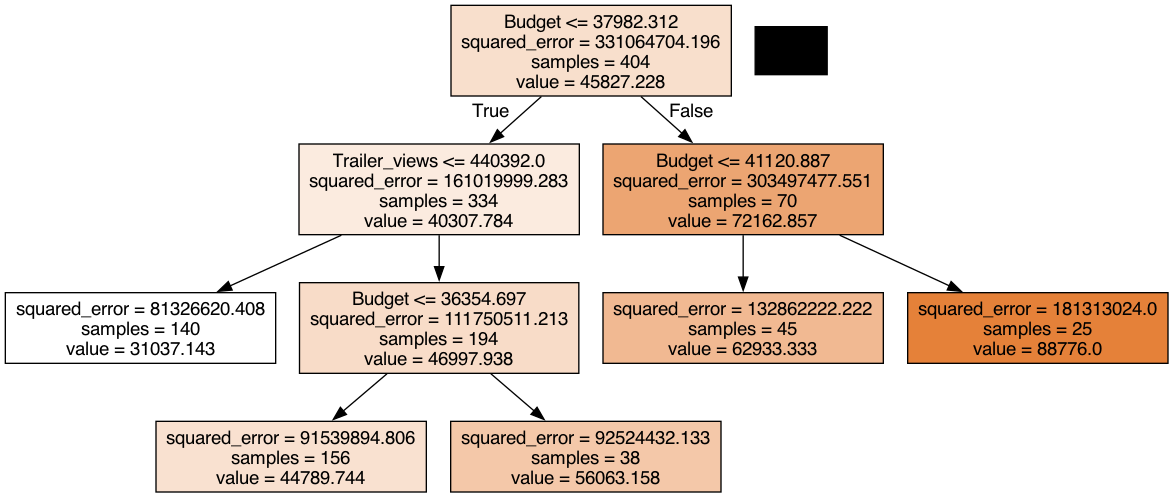

In [21]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling Tree growth

### Maximum number of levels in tree

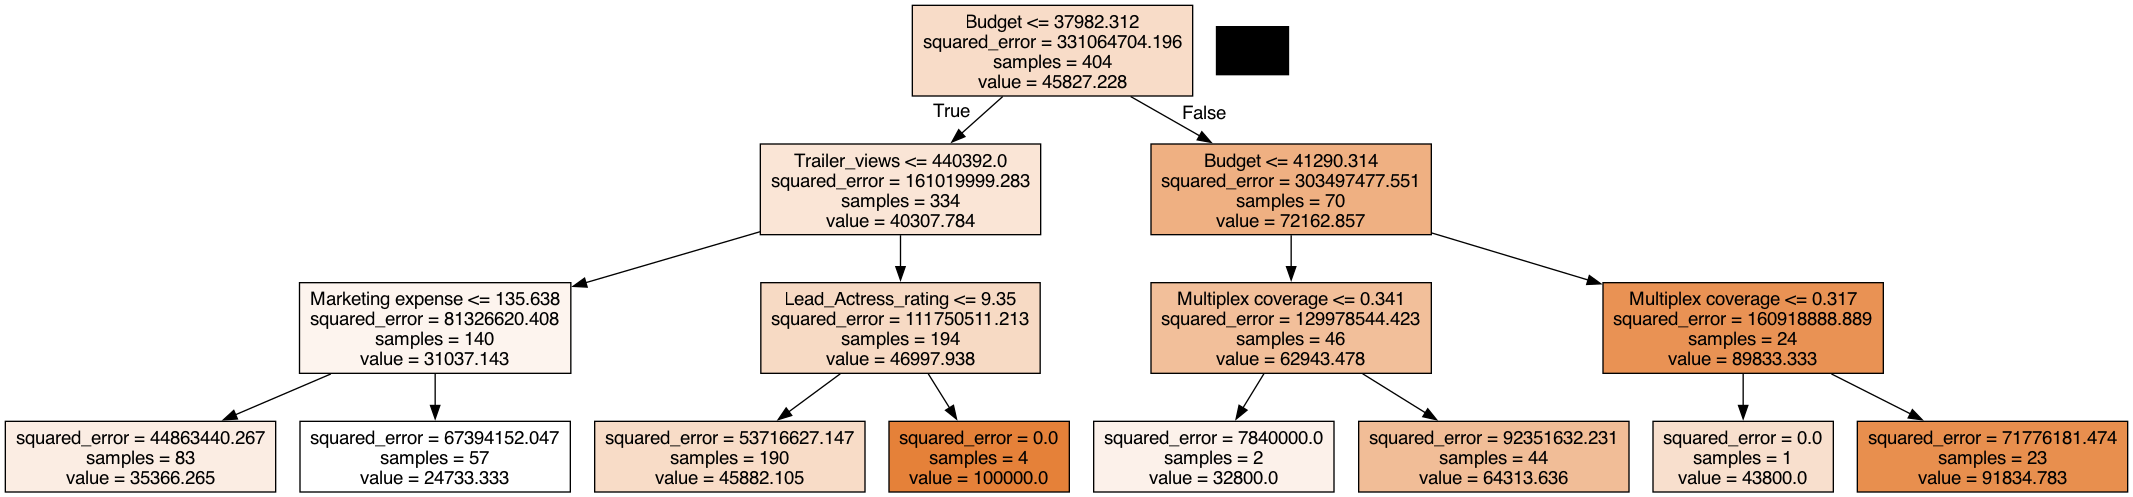

In [22]:
regtree1 = DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train, y_train)
dot_data = export_graphviz(regtree1, out_file=None,feature_names= X_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())


In [23]:
y_pred = regtree1.predict(X_test)
print(f"MAE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"r2score: {r2_score(y_test,y_pred):.2f}")

MAE: 55057378.17
r2score: 0.84


### Minimum observations at internal node

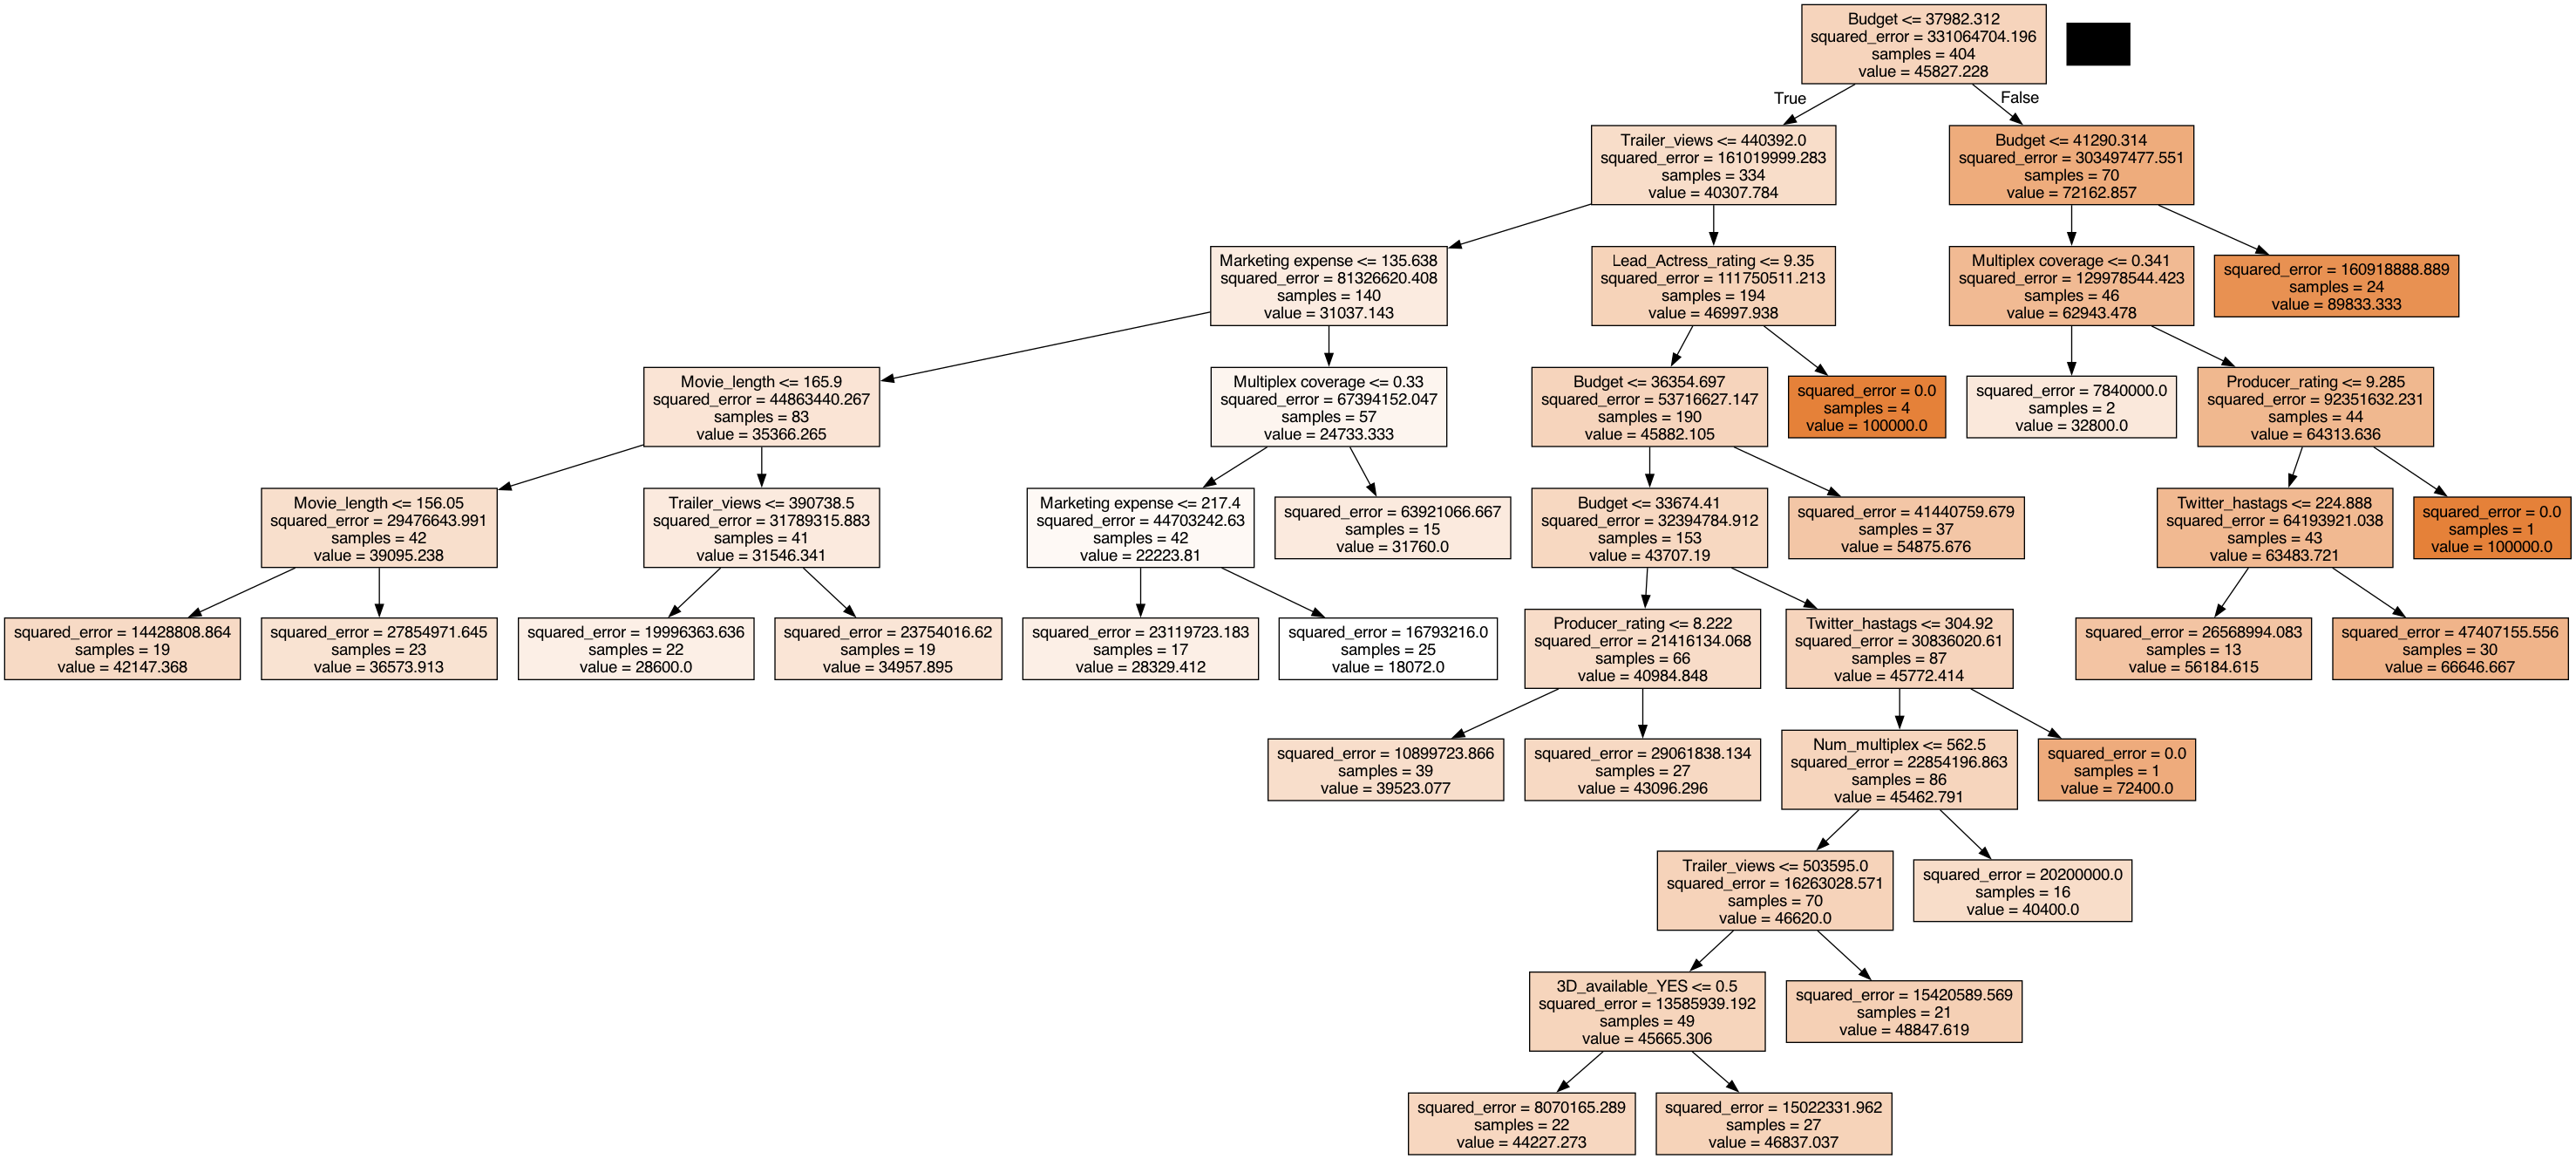

In [24]:
regtree2 = DecisionTreeRegressor(min_samples_split = 40)
regtree2.fit(X_train, y_train)
dot_data = export_graphviz(regtree2, out_file=None,feature_names= X_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [25]:
y_pred = regtree2.predict(X_test)
print(f"MAE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"r2score: {r2_score(y_test,y_pred):.2f}")

MAE: 58521080.99
r2score: 0.83


### Minimum observations at leaf node

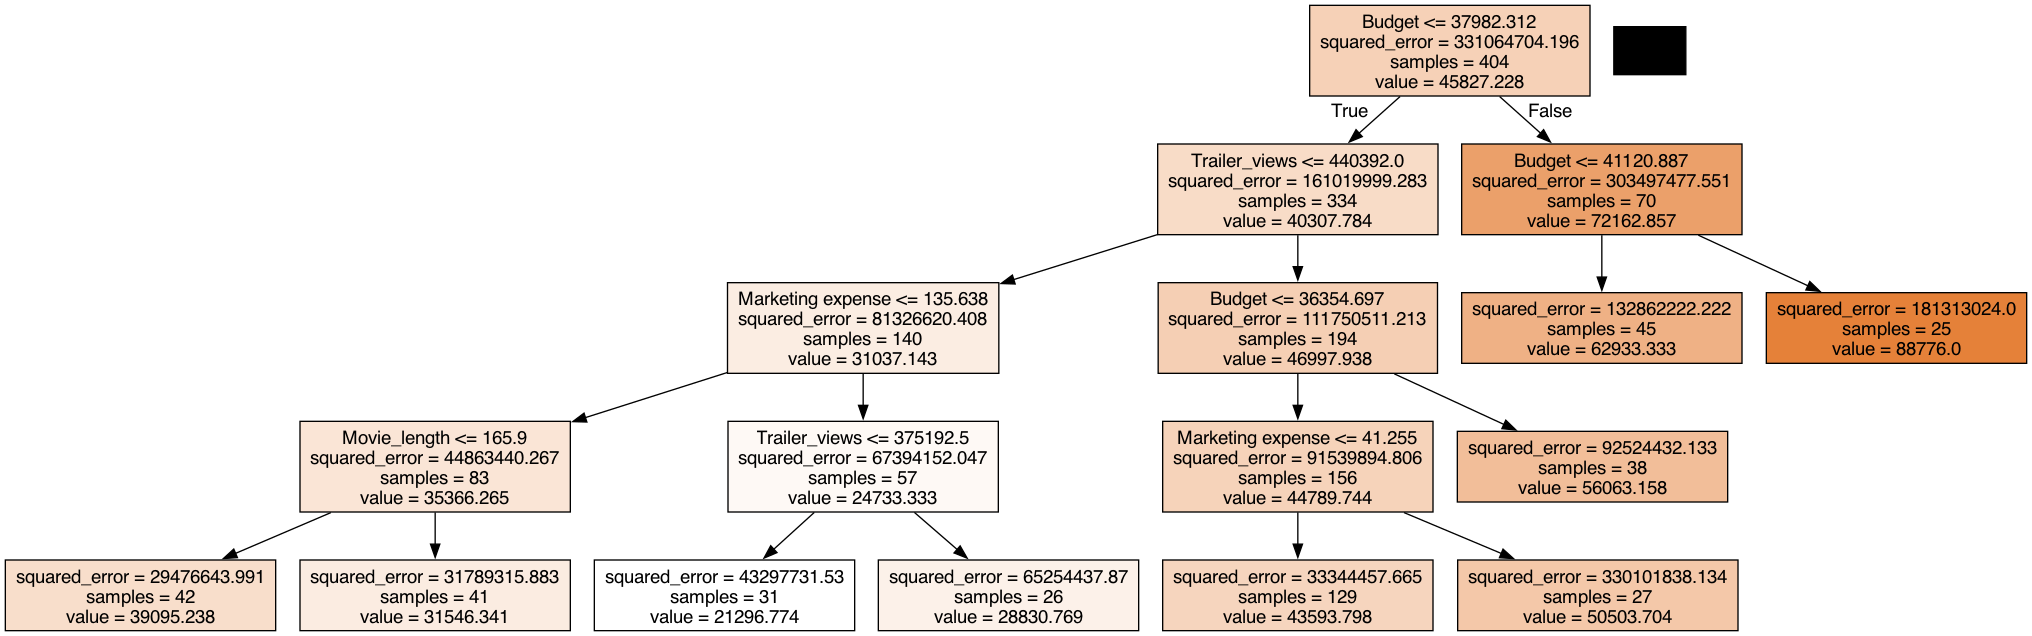

In [26]:
regtree3 = DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
regtree3.fit(X_train, y_train)
dot_data = export_graphviz(regtree3, out_file=None,feature_names= X_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [27]:
y_pred = regtree3.predict(X_test)
print(f"MAE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"r2score: {r2_score(y_test,y_pred):.2f}")

MAE: 82653889.75
r2score: 0.76


## Finding best params

In [43]:
best_r2_score = 0
best_max_depth = best_min_samples_split = best_min_samples_leaf = 0

max_depth_range = np.arange(1,7)
min_samples_split_range = np.arange(5,61,5)
min_samples_leaf_range = np.arange(5,61,5)

for i in max_depth_range:
    for j in min_samples_split_range:
        for k in min_samples_leaf_range:
            model = DecisionTreeRegressor(max_depth=i, min_samples_split=j, min_samples_leaf=k)
            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            r2score = r2_score(y_test, y_pred)
            if r2score > best_r2_score:
                best_r2_score = r2score
                best_max_depth = i
                best_min_samples_split = j
                best_min_samples_leaf = k
    
print(f"""Best parameters: max_depth={best_max_depth}, min_samples_split={best_min_samples_split}, 
      min_samples_leaf={best_min_samples_leaf}\nr2score={best_r2_score}""")


Best parameters: max_depth=5, min_samples_split=50, 
      min_samples_leaf=5
r2score=0.8177217374581187


array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])